In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import time
from nltk import pos_tag
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

## Gathering

Gathering Data for this Project composed from three pieces of data as described below:

- The WeRateDogs Twitter archive. We manually downloaded this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)
- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL of the file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- Each tweet's retweet count and favorite (i.e. "like") count and any additional data we found interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we could query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data stored in a line.

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in rate_dogs
rate_dogs = pd.read_csv("twitter-archive-enhanced.csv" , sep=",")

In [3]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)
# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep ="\t")

In [4]:
# Autontification to twetter API

# Generate your own at https://apps.twitter.com/app
consumer_key = 'qhSwqxpKslaBZofulQi598DrI'
consumer_secret = 'UTdmFpZb24IHcGc8CAaxArwq6LfyVMgUZz1gSuJuHyu7lj7hD0'
access_token = '793618519-K9kFIsgzD9vhp14kD5GxOLnGFEGl3jnjVZnwcMh5'
access_token_secret = 'ySEfCVU4qhRHZ8dTC7r1geQjFABInO0r79MWlK6TZxzLB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [5]:
# Liste where we will store the dictionaries of our result
df_list = []
# Liste frame where we will store the tweet_id of the errors
error_list = []
# Calculate the time of excution
start = time.time()
# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in rate_dogs['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        favorites = page['favorite_count'] 
        retweets = page['retweet_count'] 
        user_followers = page['user']['followers_count'] 
        user_favourites = page['user']['favourites_count'] 
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [6]:
print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(error_list))

The lengh of the result 2331
The lengh of the errors 25


In [7]:
# We repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        user_followers = page['user']['followers_count']
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [8]:
print("The lengh of the result after Querying the errors separately", len(df_list))

The lengh of the result after Querying the errors separately 2356


In [9]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', index=False)

In [10]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt')

## Assess
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues will be our newt step. We will detect and document at quality issues and tidiness issues.

In [11]:
# Print all rate_dogs dataset to assess it visually
rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# Assessing the data programmaticaly
rate_dogs.info()
rate_dogs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
rate_dogs['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
rate_dogs['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
rate_dogs['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Buddy           7
Toby            7
Bailey          7
Daisy           7
Bella           6
Milo            6
Jax             6
Rusty           6
Koda            6
Oscar           6
Stanley         6
Leo             6
Jack            6
Dave            6
Scout           6
Bentley         5
             ... 
life            1
Charl           1
Storkson        1
Claude          1
Brandi          1
Taz             1
Bobb            1
Simba           1
Banditt         1
Millie          1
Harrison        1
Lacy            1
Kathmandu       1
DonDon          1
Mutt            1
Julio           1
Derby           1
Tuco            1
Kenzie          1
Cedrick         1
Patch           1
Pete            1
Arnold          1
Maks            1
Beemo     

In [16]:
# Print all images dataset to assess it visually
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
# Assessing the data programmaticaly
images.info()
sum(images['jpg_url'].duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


66

In [18]:
# Print all json_tweets dataset to assess it visually
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35285,7446,8929133,146184,2017-08-01 16:23:56
1,892177421306343426,30528,5531,8929133,146184,2017-08-01 00:17:27
2,891815181378084864,22967,3657,8929133,146184,2017-07-31 00:18:03
3,891689557279858688,38566,7616,8929133,146184,2017-07-30 15:58:51
4,891327558926688256,36852,8207,8929133,146184,2017-07-29 16:00:24
5,891087950875897856,18584,2751,8929133,146184,2017-07-29 00:08:17
6,890971913173991426,10802,1779,8929133,146183,2017-07-28 16:27:12
7,890729181411237888,59448,16648,8929133,146182,2017-07-28 00:22:40
8,890609185150312448,25576,3803,8929133,146184,2017-07-27 16:25:51
9,890240255349198849,29178,6459,8929133,146184,2017-07-26 15:59:51


In [19]:
# Assessing the data programmaticaly
json_tweets.info()
json_tweets['tweet_id'].duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id           2356 non-null int64
favorites          2356 non-null int64
retweets           2356 non-null int64
user_followers     2356 non-null int64
user_favourites    2356 non-null int64
date_time          2356 non-null object
dtypes: int64(5), object(1)
memory usage: 110.5+ KB


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331     True
2332     True
2333     True
2334     True
2335     True
2336     True
2337     True
2338     True
2339     True
2340     True
2341     True
2342     True
2343     True
2344     True
2345     True
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
Name: tweet_id, Length: 2356, dtype: bool

In [20]:
json_tweets.loc[2331:2355]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2331,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2332,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2333,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2334,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2335,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2336,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2337,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2338,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2339,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08
2340,666020888022790149,2353,445,8929147,146189,2015-11-15 22:32:08



Quality

rate_dogs dataset

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be   intergs instead of float
- retweeted_status_timestamp, timestamp should be datetime instead of object (string)
- The numerator and denominator columns have invalid values
- In several columns null objects are non-null (None to NaN)
- Name column have invalid names i.e 'None', 'a', 'an'
- We only want original ratings (no retweets) that have images

images dataset

- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url

json_tweeets dataset

- This tweet_id (666020888022790149) duplicated 25 times

Tidiness

- No need to all the informations in images dataset
- Various stages of dogs in columns instead of rows rate_dogs dataset
- We may want to add a gender column from the text columns in rate_dogs dataset
- All tables should be part of one dataset

## Clean
Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.

In [21]:
# Since we want to create one high quality and tidy master pandas DataFrame
# we will start by merging our dataframe in one
# the we save the result in file as backup
df_master = pd.merge(rate_dogs, images, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, json_tweets, how = 'left', on = ['tweet_id'])
df_master.to_csv('df_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 33 columns):
tweet_id                      2381 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2381 non-null object
source                        2381 non-null object
text                          2381 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2322 non-null object
rating_numerator              2381 non-null int64
rating_denominator            2381 non-null int64
name                          2381 non-null object
doggo                         2381 non-null object
floofer                       2381 non-null object
pupper                        2381 non-null object
puppo                         2381 non-null object
jpg_url                       21

In [22]:
df_master = df_master[pd.isnull(df_master.retweeted_status_id)]
df_master = df_master.drop_duplicates()
df_master = df_master.dropna(subset = ['jpg_url'])

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

### Copies of the original pieces of data 

In [64]:
rate_dogs_copy = rate_dogs.copy()
images_copy = images.copy()
json_tweets_copy = json_tweets.copy()
df_master_copy = df_master.copy()

### Quick Clean to rows and columns that we will not need

In [24]:
# Delete the retweets
df_master = df_master[pd.isnull(df_master.retweeted_status_id)]
# Delete duplicated tweet_id
df_master = df_master.drop_duplicates()
# Delete tweets with no pictures
df_master = df_master.dropna(subset = ['jpg_url'])

# test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

In [25]:
# Delete columns related to retweet we don't need anymore
df_master = df_master.drop('retweeted_status_id', 1)
df_master = df_master.drop('retweeted_status_user_id', 1)
df_master = df_master.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
df_master = df_master.drop('date_time', 1)

# test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                    

### Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'

In [26]:
# Select the columns to melt and to remain
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in df_master.columns.tolist() if x not in columns_to_melt]

# Mlet the the columns into values
df_master = pd.melt(df_master, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

# Delete column 'stages'
df_master = df_master.drop('stages', 1)

# Filter for unique values then remove duplicate values based on 'dog_stage' values

# This part for test *
print(df_master.dog_stage.value_counts())

df_master = df_master.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64


### Get rid of image prediction columns

In [27]:
# We will store the fisrt true algorithm with it's level of confidence
prediction_algorithm = []
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

df_master.apply(get_prediction_confidence, axis=1)
df_master['prediction_algorithm'] = prediction_algorithm
df_master['confidence_level'] = confidence_level

# Delete the columns of image prediction information
df_master = df_master.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

# Test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 18 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
favorites                1987 non-null float64
retweets                 1987 non-null float64
user_followers           1987 non-null float64
user_favourites          1987 non-null float64
dog_stage                1994 non-null object
prediction_algorithm     1994 non-null object
confidence_level         1994 non-null float64
dtypes: float64(7), int64(3), object(8)
memory usage: 296.0+ K

### Check for the duplicated values and delete useless informations

In [28]:
# Print the count of the unique elements in all columns
df_master.nunique()

tweet_id                 1994
in_reply_to_status_id      22
in_reply_to_user_id         1
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      936
jpg_url                  1994
favorites                1819
retweets                 1544
user_followers             22
user_favourites             7
dog_stage                   5
prediction_algorithm      114
confidence_level         1684
dtype: int64

In [29]:
# concentrate on low values
df_master.info()
df_master['in_reply_to_user_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 18 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
favorites                1987 non-null float64
retweets                 1987 non-null float64
user_followers           1987 non-null float64
user_favourites          1987 non-null float64
dog_stage                1994 non-null object
prediction_algorithm     1994 non-null object
confidence_level         1994 non-null float64
dtypes: float64(7), int64(3), object(8)
memory usage: 296.0+ K

4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64

In [30]:
df_master['user_favourites'].value_counts()

146188.0    789
146184.0    646
146189.0    540
146185.0      5
146190.0      3
146183.0      2
146182.0      2
Name: user_favourites, dtype: int64

In [31]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_master = df_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

In [32]:
#concentrate on low values
df_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
# Clean the content of source column
df_master['source'] = df_master['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

# Test
df_master['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Fill empty names and Correct the bad ones
The examples we could notice from assessing the data visually:
- This is [name] ..
- Meet [name] ..
- Say hallo to [name] ..
- Here we have [name] ..
- .. named [name] ..

In [34]:
# Loop on all the texts and check if the comment has one of the above conditions
# and append the result in a list
dog_names = []

for text in df_master['text']:
    # Start with 'This is ' and the fisrt letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the fisrt letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Contain 'named' and the fisrt letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('NaN')

# Test
print(len(dog_names))

# Save the result in a new column 'dog_name'
df_master['dog_name'] = dog_names

# Test
print("New column dog_name count \n", df_master.dog_name.value_counts())
print("Old column name count \n", df_master.name.value_counts())

1994
New column dog_name count 
 NaN           625
Charlie        11
Cooper         10
Oliver         10
Lucy           10
Penny           9
Tucker          9
Sadie           8
Winston         8
Daisy           7
Lola            7
Toby            6
Koda            6
Jax             6
Stanley         6
Bo              6
Bella           6
Milo            5
Scout           5
Leo             5
Rusty           5
Buddy           5
Bailey          5
Chester         5
Oscar           5
Louis           5
Archie          4
Sophie          4
Finn            4
Clark           4
             ... 
Miley           1
Monster         1
Pinot           1
Farfle          1
Kaia            1
Kingsley        1
Huck            1
Taz             1
Simba           1
Lucky           1
Maks            1
Millie          1
Kathmandu       1
DonDon          1
Mutt            1
Hermione        1
Derby           1
Patch           1
Arnold          1
Beemo           1
Craig           1
Ace             1
Karma        

In [35]:
#delete the old name column now
df_master = df_master.drop(['name'], 1)
#Test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 15 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
rating_numerator        1994 non-null int64
rating_denominator      1994 non-null int64
jpg_url                 1994 non-null object
favorites               1987 non-null float64
retweets                1987 non-null float64
user_followers          1987 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1994 non-null object
confidence_level        1994 non-null float64
dog_name                1994 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 249.2+ KB


### Get Dogs gender column from text column

In [36]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_master['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
df_master['dog_gender'] = dog_gender

# Test
print("dog_gender count \n", df_master.dog_gender.value_counts())

dog_gender count 
 NaN       1132
male       636
female     226
Name: dog_gender, dtype: int64


### Fill empty rating and Correct the bad ones

In [37]:
# Get ratings and treat them depending to their situation
ratings = df_master['text'].apply(lambda x: re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x))
# Add new columns to store the new ratings and the count of dogs in each tweet
rating_numerator = []
rating_denominator = []
dogs_count = []

for rate in ratings:
    # Tweets with no rating
    if len(rate) == 0:
        rating_numerator.append('NaN')
        rating_denominator.append('NaN')
        dogs_count.append(1) # It has a picture so it is a dog
    
    # Tweets with one rate
    elif len(rate) == 1:
        x = (float(rate[0][0]) / (float(rate[0][-1])/10))
        if x > 10.0:
            rating_numerator.append(x)
        else:
            rating_numerator.append(11.0)
        rating_denominator.append(10.0)
        dogs_count.append(float(rate[0][-1]) / 10) 
                                # We assume that the ratings who had rating_denominator different than 10
                                # are for group of dogs i.e : https://t.co/yGQI3He3xv
    # we take the average of the tweet with more than one rating
    elif len(rate) > 1 and rate[0][-1] == '10':
        rating_plus = 0
        rating_avg = 0
        for i in range(len(rate)):
            rating_plus = rating_plus + float(rate[i][0])
        result_avg = (rating_plus / len(rate))
        if result_avg > 10.0:
            rating_numerator.append(result_avg)
        else:
            rating_numerator.append(11.0)
        rating_denominator.append(10)
        dogs_count.append(len(rate))
    else: # without this block I get ValueError: Length of values does not match length of index
          # We will try to catch the errors this  why and see why this happend
        rating_numerator.append('Error')
        rating_denominator.append('Error')
        dogs_count.append('Error')

df_master['new_rating_numerator'] = rating_numerator
df_master['new_rating_denominator'] = rating_denominator
df_master['dogs_count'] = dogs_count
df_master['new_rating_numerator'].value_counts()

11.0      1233
12.0       453
13.0       261
14.0        36
Error        2
10.5         2
1776.0       1
11.5         1
NaN          1
420.0        1
13.5         1
11.26        1
11.27        1
Name: new_rating_numerator, dtype: int64

In [38]:
# Correct the errors
tweet_id_11 = df_master[df_master.new_rating_numerator == 'Error']['tweet_id'][2919]
tweet_id_13 = df_master[df_master.new_rating_numerator == 'Error']['tweet_id'][2885]

df_master.loc[df_master['tweet_id'] == tweet_id_11, 'new_rating_numerator'] = 11
df_master.loc[df_master['tweet_id'] == tweet_id_13, 'new_rating_numerator'] = 13

df_master.loc[df_master['dogs_count'] == 'Error', 'dogs_count'] = 1
df_master.loc[df_master['new_rating_denominator'] == 'Error', 'new_rating_denominator'] = 10

# Test
print(df_master.new_rating_numerator[df_master.tweet_id == tweet_id_11])
print(df_master.new_rating_numerator[df_master.tweet_id == tweet_id_13])

2919    11
Name: new_rating_numerator, dtype: object
2885    13
Name: new_rating_numerator, dtype: object


In [39]:
# Delete the old columns and update the names of the new ones
df_master = df_master.drop(['rating_numerator', 'rating_denominator'], 1)

# Rename columns
df_master.rename(columns = {'new_rating_numerator': 'rating_numerator', 
                            'new_rating_denominator': 'rating_denominator'}, inplace = True)

# Test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 17 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
jpg_url                 1994 non-null object
favorites               1987 non-null float64
retweets                1987 non-null float64
user_followers          1987 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1994 non-null object
confidence_level        1994 non-null float64
dog_name                1994 non-null object
dog_gender              1994 non-null object
rating_numerator        1994 non-null object
rating_denominator      1994 non-null object
dogs_count              1994 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 280.4+ KB


### Treat The Null Value


In [40]:
# Treat The Null Value of favorites Column
mean_fav=df_master['favorites'].mean()
df_master['favorites'].fillna(mean_fav, inplace=True)
# Treat The Null Value of retweets Column
mean_ret=df_master['retweets'].mean()
df_master['retweets'].fillna(mean_ret, inplace=True)
# Treat The Null Value of user_followers Column
mean_ufo=df_master['user_followers'].mean()
df_master['user_followers'].fillna(mean_ufo, inplace=True)

### Convert the null values to None type

In [41]:
df_master.loc[df_master['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
df_master.loc[df_master['dog_name'] == 'NaN', 'dog_name'] = None
df_master.loc[df_master['dog_gender'] == 'NaN', 'dog_gender'] = None
df_master.loc[df_master['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
df_master.loc[df_master['rating_denominator'] == 'NaN', 'rating_denominator'] = 10
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 17 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
jpg_url                 1994 non-null object
favorites               1994 non-null float64
retweets                1994 non-null float64
user_followers          1994 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1686 non-null object
confidence_level        1994 non-null float64
dog_name                1369 non-null object
dog_gender              862 non-null object
rating_numerator        1994 non-null object
rating_denominator      1994 non-null object
dogs_count              1994 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 280.4+ KB


In [42]:
# Test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 17 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
jpg_url                 1994 non-null object
favorites               1994 non-null float64
retweets                1994 non-null float64
user_followers          1994 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1686 non-null object
confidence_level        1994 non-null float64
dog_name                1369 non-null object
dog_gender              862 non-null object
rating_numerator        1994 non-null object
rating_denominator      1994 non-null object
dogs_count              1994 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 280.4+ KB


### Convert each column to its appropriate type

In [43]:
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)
df_master['source'] = df_master['source'].astype('category')
df_master['favorites'] = df_master['favorites'].astype(int)
df_master['retweets'] = df_master['retweets'].astype(int)
df_master['user_followers'] = df_master['user_followers'].astype(int)
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['rating_numerator'] = df_master['rating_numerator'].astype(float)
df_master['rating_denominator'] = df_master['rating_denominator'].astype(float)
df_master['dogs_count'] = df_master['dogs_count'].astype(int)
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

# Test
df_master.dtypes

tweet_id                        object
timestamp               datetime64[ns]
source                        category
text                            object
expanded_urls                   object
jpg_url                         object
favorites                        int64
retweets                         int64
user_followers                   int64
dog_stage                     category
prediction_algorithm            object
confidence_level               float64
dog_name                        object
dog_gender                    category
rating_numerator               float64
rating_denominator             float64
dogs_count                       int64
dtype: object

### Rename columns to be more expressive *and Clean if needed*

In [44]:
df_master = df_master.rename(columns = {'timestamp': 'tweet_date', 'source': 'tweet_source', 'text': 'tweet_text', 
                                        'expanded_urls': 'tweet_url', 'jpg_url': 'tweet_picture_predicted', 
                                        'favorites': 'tweet_favorites', 'retweets': 'tweet_retweets',
                                        'prediction_algorithm' : 'dog_breed'})

In [45]:
# All rating_denominator has one value 10
# We will delete this column
print(df_master.rating_denominator.value_counts())
df_master.drop('rating_denominator', 1, inplace = True)

10.0    1994
Name: rating_denominator, dtype: int64


In [46]:
# Test
list(df_master)

['tweet_id',
 'tweet_date',
 'tweet_source',
 'tweet_text',
 'tweet_url',
 'tweet_picture_predicted',
 'tweet_favorites',
 'tweet_retweets',
 'user_followers',
 'dog_stage',
 'dog_breed',
 'confidence_level',
 'dog_name',
 'dog_gender',
 'rating_numerator',
 'dogs_count']

## Storing

In [47]:
# Store the clean DataFrame in a CSV file
df_master.to_csv('twitter_archive_master.csv', index=False)
#Test
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
dog_stage                  1994 non-null object
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
dog_name                   1369 non-null object
dog_gender                 862 non-null object
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 249.3+ KB


# Analyzing, and Visualizing Data

In [48]:
# Change the style of the plots (http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)
matplotlib.style.use('ggplot')

In [49]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
dog_stage                  1994 non-null object
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
dog_name                   1369 non-null object
dog_gender                 862 non-null object
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 249.3+ KB


In [50]:
# Convert columns to their appropriate types and set the tweet_date as an index

df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['tweet_date'] = pd.to_datetime(df_master.tweet_date)
df_master['tweet_source'] = df_master['tweet_source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

df_master = df_master.set_index('tweet_date')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2015-11-19 18:13:27 to 2016-06-16 01:25:36
Data columns (total 15 columns):
tweet_id                   1994 non-null object
tweet_source               1994 non-null category
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
dog_stage                  1994 non-null category
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
dog_name                   1369 non-null object
dog_gender                 862 non-null category
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dtypes: category(3), float64(2), int64(4), object(6)
memory usage: 208.7+ KB


### Plot the correlation map to see the relationship between our variables

Text(0.5,1,'Correlation Map')

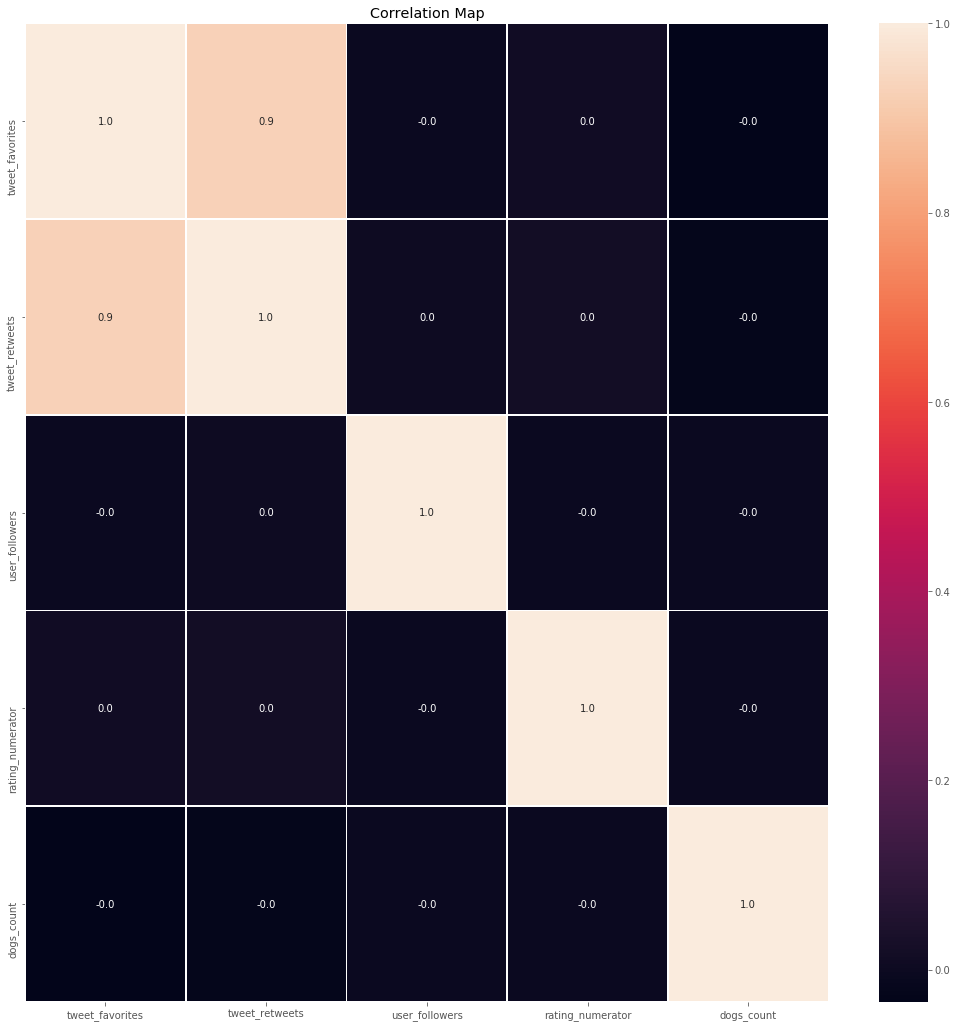

In [51]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_master[['tweet_source', 'tweet_favorites',
                       'tweet_retweets', 'user_followers', 
                       'rating_numerator', 'dogs_count']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between tweet_favorites and tweet_retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.1 (this seems the opposite of normal prediction)
- More dogs in the picture doesn't mean high rating
- Rating don't get affected with any other variable from the ones we ploted

### tweet_favorites and tweet_retweet

Text(0.5,1,'Retweets and favorites Scatter plot')

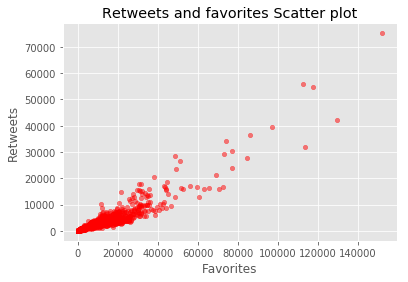

In [52]:
df_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As the correlation map shows if the count of retweet is high the count of favorites go high

In [53]:
top_retweet_count_url = df_master.tweet_url[df_master.tweet_retweets == max(df_master.tweet_retweets)][0]
print("The maximum number of retweet is: {}, for the tweet: {}".format(max(df_master.tweet_retweets), top_retweet_count_url))

top_favorites_count_url = df_master.tweet_url[df_master.tweet_favorites == max(df_master.tweet_favorites)][0]
print("The maximum number of favorites is: {}, for the tweet: {}".format(max(df_master.tweet_favorites), top_favorites_count_url))

The maximum number of retweet is: 75139, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1
The maximum number of favorites is: 152061, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1


### Rating System

Text(0,0.5,'Rating')

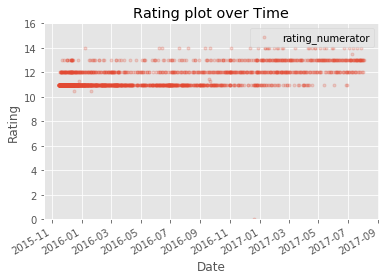

In [54]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df_master.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [55]:
df_master[df_master['rating_numerator'] <= 14]['rating_numerator'].describe()

count    1992.000000
mean       11.540427
std         0.829926
min         0.000000
25%        11.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

- More than 75% of the data has more than 12/10 as rating
- The page start with small rating than they adopt the system of rating numerator more than the denominator

### Famous Breeds

Text(0,0.5,'dog_breed')

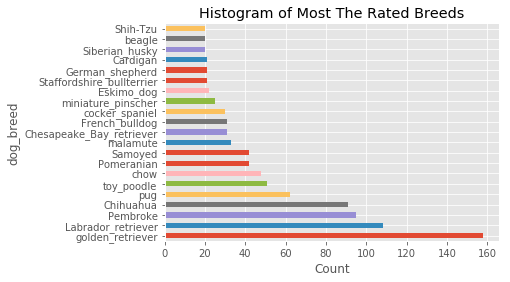

In [56]:
# Without specify the lengh we don't get good result so we will subset our data on the most owned
df_by_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)

df_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

- Top two famous breeds are : Golden_retriver and Labrador_retriver according to a meural network that can classify breeds of dogs

### Famous dog gender

Text(0.5,1,'Dog Gender Partitions')

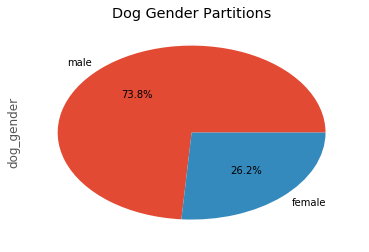

In [57]:
# Plot the data partitioned by dog gender
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')

In [58]:
# Which gender had high ratings
df_master[['dog_gender', 'rating_numerator']][df_master.dog_gender.notnull()].groupby('dog_gender').mean()

,rating_numerator
dog_gender,
female,11.727876
male,11.542453


- According to our treatment (getting the gender from the text of the tweet) we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean

### Famous dog Stages

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

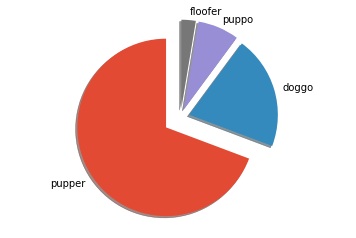

In [59]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Text(0.5,1,'')

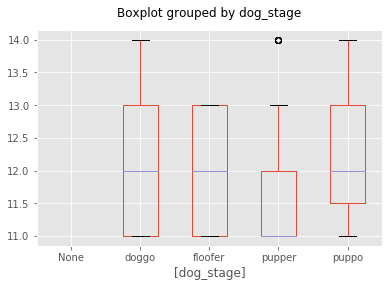

In [60]:
# Plot the dog stages with ratings
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')

In [61]:
#df_master[df_master['dog_stage'] == None].groupby('dog_stage')['rating_numerator'].describe()
df_master[df_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      12.126984
floofer    12.000000
pupper     11.468255
puppo      12.260870
Name: rating_numerator, dtype: float64

- Puppers represent the big number of our pie, but it has the lowest mean rating

# Conclusion 

The Twitter account WeRateDogs ([@dog_rates](https://twitter.com/dog_rates)) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". It has acquired over 4.50 million followers since its debut.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother - take pictures, send it to @dog_rates and get funny cute comments with high rates